In [54]:
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline
%precision 3


#行の表示数の上限を撤廃
pd.set_option('display.max_rows', None)

#列の表示数の上限を撤廃
pd.set_option('display.max_columns', None)

In [55]:
import requests,zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [56]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
bank.shape

(45211, 17)

In [58]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [59]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [60]:
bank_int= bank.select_dtypes(include=int)
bank_int.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [61]:
bank_int_corr = bank_int.corr()
bank_int_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


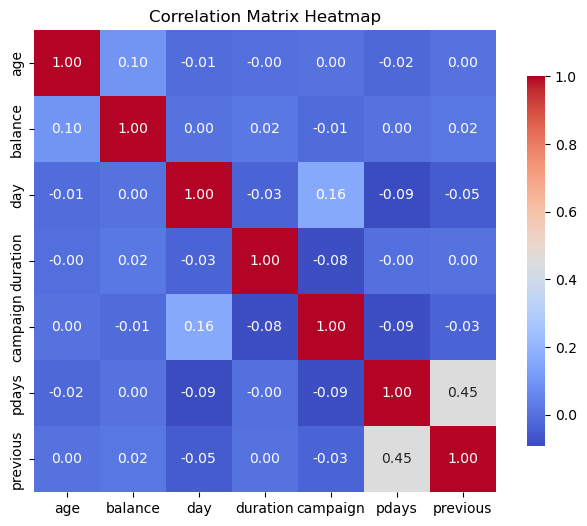

In [62]:
# ヒートマップの描画
plt.figure(figsize=(8, 6))  # 図のサイズを指定
sns.heatmap(bank_int_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')
plt.show()

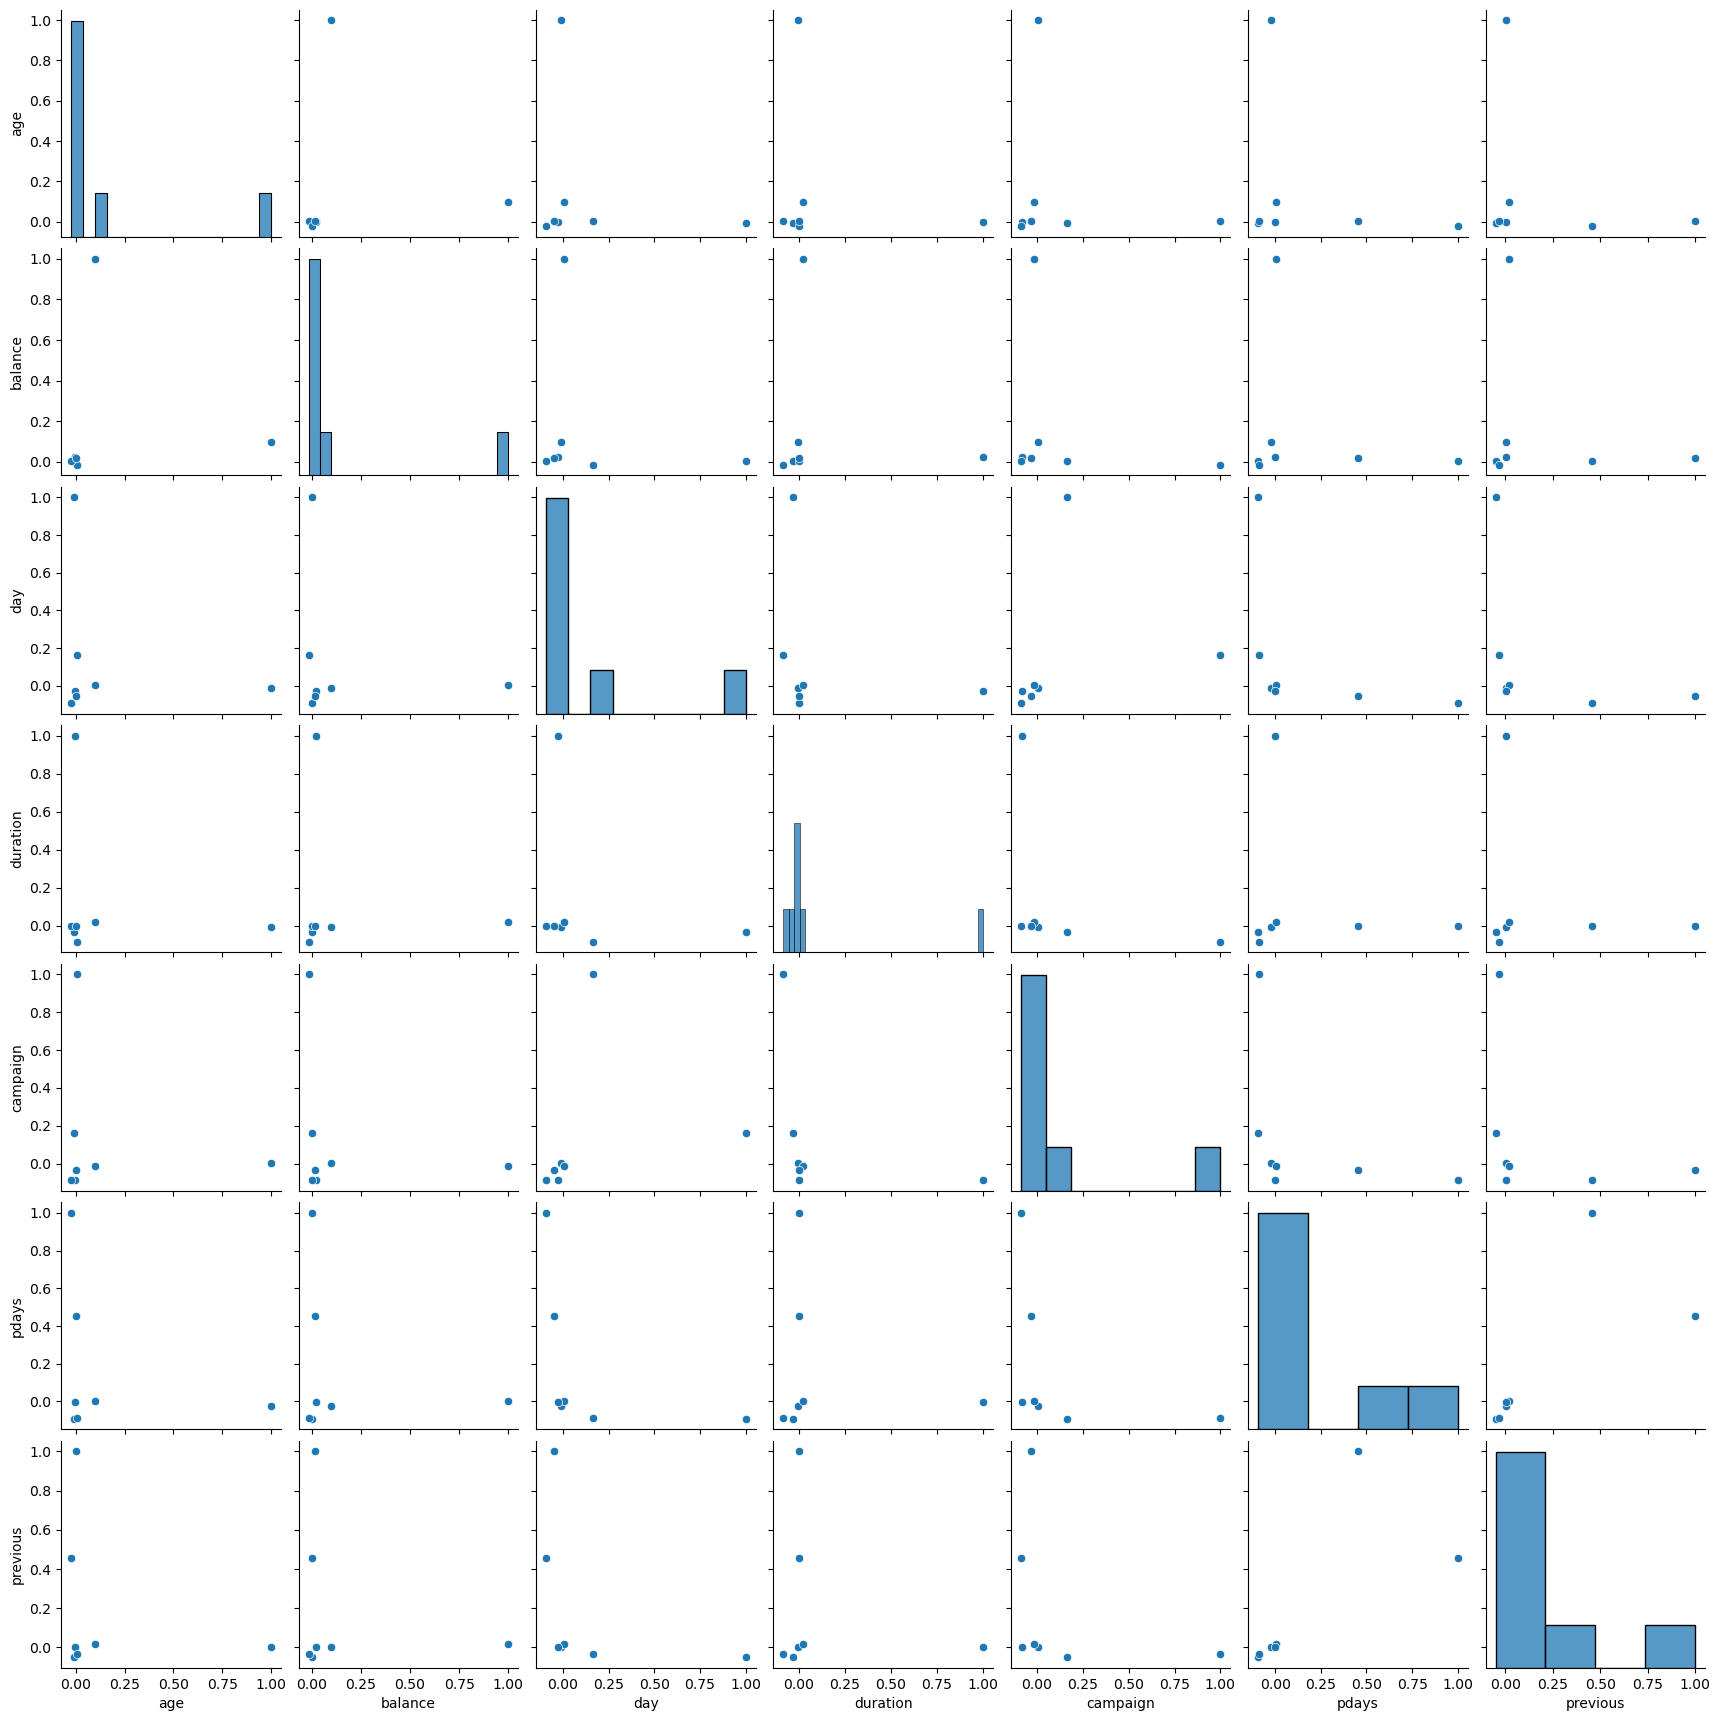

In [63]:
sns.pairplot( bank_int_corr )

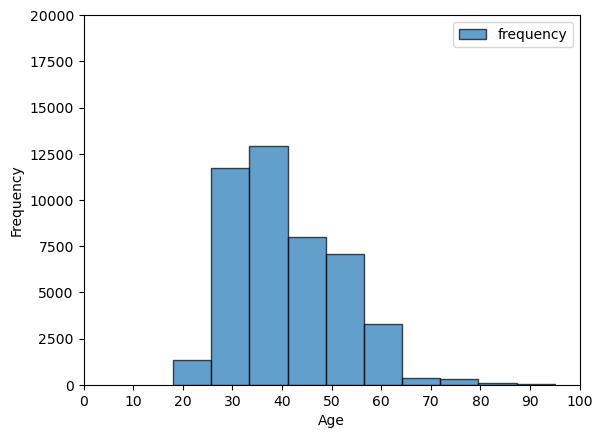

In [64]:
plt.hist(bank["age"], 
         bins=10, 
         label="frequency", 
         edgecolor="black", 
         alpha=0.7)  
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.xlim(0, 100) 
plt.xticks(range(0, 101, 10)) 

# y軸の範囲を設定
plt.ylim(0, 20000)

plt.legend()
plt.show()

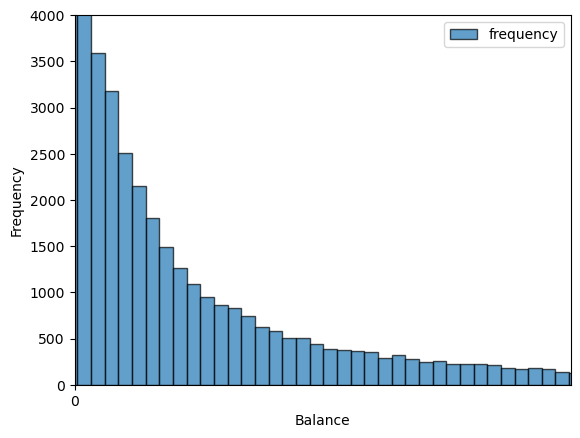

In [65]:
plt.hist(bank["balance"], 
         bins=1000, 
         label="frequency", 
         edgecolor="black", 
         alpha=0.7)  
plt.xlabel("Balance")
plt.ylabel("Frequency")

plt.xlim(0, 4000) 
plt.xticks(range(0, 4001, 10000)) 

# y軸の範囲を設定
plt.ylim(0, 4000)

plt.legend()
plt.show()

In [66]:
bank_int.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [67]:
bank.count(axis=0)

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [68]:
bank.groupby('age').count().head(50)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
18,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
19,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
20,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
21,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
22,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
23,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
24,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
25,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
26,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805


In [69]:
bank.groupby('age').count().tail(27)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
68,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
69,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
70,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
71,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
72,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
73,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
74,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
75,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
76,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [70]:
bank.groupby(['age', 'job']).mean(numeric_only=True)

balance        day     duration   campaign  \
age job                                                              
18  student          372.416667  11.833333   214.166667   1.750000   
19  student          539.771429  12.514286   175.485714   2.914286   
20  admin.           201.000000  12.000000   104.000000   1.500000   
    blue-collar      114.000000  16.500000   391.250000   1.750000   
    services        -103.000000  13.000000   180.000000   1.000000   
    student          961.441860  16.348837   202.372093   2.209302   
21  admin.           225.800000  22.000000   187.800000   1.600000   
    blue-collar      552.714286  15.857143   186.428571   2.071429   
    entrepreneur    2077.000000   5.000000   323.000000   1.000000   
    management       467.000000  15.000000   200.000000   1.500000   
    services        1324.250000  13.750000   237.750000   2.250000   
    student         1013.478261  14.913043   227.500000   1.956522   
    technician       251.000000  11.250000    73.250000   1.250000   
    unemployed      1225.000000   5.333333   167.666667   1.333333   
22  admin.           674.500000  12.000000   261.357143   1.785714   
    blue-collar      527.733333  18.000000   256.666667   2.933333   
    housemaid       1223.000000  20.000000   275.000000   3.500000   
    management       339.833333  14.166667   214.500000   2.166667   
    self-employed   1459.000000  13.500000   218.000000   2.000000   
    services         837.888889  14.500000   149.666667   1.611111   
    student         1162.746032  13.476190   243.349206   1.746032   
    technician       825.375000  20.750000   298.625000   2.500000   
    unemployed       993.000000  28.000000   115.000000   3.000000   
23  admin.           557.160000  14.880000   251.160000   1.720000   
    blue-collar     1211.717949  14.666667   327.230769   1.871795   
    entrepreneur     540.333333  16.333333   235.666667   3.000000   
    housemaid        508.750000  17.500000   486.750000   2.500000   
    management      1065.363636  22.272727   244.909091   2.363636   
    self-employed    780.000000  16.000000   393.000000   1.000000   
    services         494.176471  15.294118   304.558824   3.088235   
    student         1092.736842  14.666667   292.736842   2.385965   
    technician      1348.625000  15.500000   315.583333   2.166667   
    unemployed      5295.750000  15.500000   245.500000   1.000000   
24  admin.           506.159091  14.363636   212.113636   2.500000   
    blue-collar      726.960000  16.280000   290.693333   2.213333   
    entrepreneur      69.000000  18.000000    35.000000   3.000000   
    management       918.000000  14.700000   377.450000   2.500000   
    retired          366.000000  16.000000   234.000000   2.000000   
    self-employed   1389.500000  18.750000   249.000000   1.500000   
    services         478.103448  16.620690   375.448276   1.689655   
    student         1722.718310  13.901408   262.845070   2.690141   
    technician       597.065217  15.652174   304.152174   2.760870   
    unemployed       834.428571  15.857143   161.142857   2.285714   
25  admin.           622.955882  15.470588   272.808824   3.014706   
    blue-collar      506.313559  16.813559   345.220339   2.516949   
    entrepreneur    1934.111111  19.555556   244.000000   2.222222   
    housemaid        669.000000  24.000000   367.000000   2.000000   
    management       946.628571  14.928571   284.442857   2.214286   
    retired          366.000000  15.000000   102.000000   2.000000   
    self-employed    789.357143  14.214286   275.642857   1.714286   
    services         633.773333  15.706667   237.986667   3.440000   
    student         1318.843373  15.819277   273.265060   1.915663   
    technician      1295.933333  15.600000   292.106667   2.693333   
    unemployed       591.727273  12.454545   225.545455   4.545455   
    unknown          166.000000  10.500000   147.000000   1.500000   
26  admin.           770.345455  1

In [71]:
bank.groupby(['age', 'job']).count()

marital  education  default  balance  housing  loan  \
age job                                                                  
18  student             12         12       12       12       12    12   
19  student             35         35       35       35       35    35   
20  admin.               2          2        2        2        2     2   
    blue-collar          4          4        4        4        4     4   
    services             1          1        1        1        1     1   
    student             43         43       43       43       43    43   
21  admin.               5          5        5        5        5     5   
    blue-collar         14         14       14       14       14    14   
    entrepreneur         1          1        1        1        1     1   
    management           2          2        2        2        2     2   
    services             4          4        4        4        4     4   
    student             46         46       46       46       46    46   
    technician           4          4        4        4        4     4   
    unemployed           3          3        3        3        3     3   
22  admin.              14         14       14       14       14    14   
    blue-collar         15         15       15       15       15    15   
    housemaid            2          2        2        2        2     2   
    management           6          6        6        6        6     6   
    self-employed        2          2        2        2        2     2   
    services            18         18       18       18       18    18   
    student             63         63       63       63       63    63   
    technician           8          8        8        8        8     8   
    unemployed           1          1        1        1        1     1   
23  admin.              25         25       25       25       25    25   
    blue-collar         39         39       39       39       39    39   
    entrepreneur         3          3        3        3        3     3   
    housemaid            4          4        4        4        4     4   
    management          11         11       11       11       11    11   
    self-employed        1          1        1        1        1     1   
    services            34         34       34       34       34    34   
    student             57         57       57       57       57    57   
    technician          24         24       24       24       24    24   
    unemployed           4          4        4        4        4     4   
24  admin.              44         44       44       44       44    44   
    blue-collar         75         75       75       75       75    75   
    entrepreneur         1          1        1        1        1     1   
    management          20         20       20       20       20    20   
    retired              1          1        1        1        1     1   
    self-employed        8          8        8        8        8     8   
    services            29         29       29       29       29    29   
    student             71         71       71       71       71    71   
    technician          46         46       46       46       46    46   
    unemployed           7          7        7        7        7     7   
25  admin.              68         68       68       68       68    68   
    blue-collar        118        118      118      118      118   118   
    entrepreneur         9          9        9        9        9     9   
    housemaid            1          1        1        1        1     1   
    management          70         70       70       70       70    70   
    retired              1          1        1        1        1     1   
    self-employed       14         14       14       14       14    14   
    services            75         75       75       75       75    75   
    student             83         83       83       83       83    83   
    technician         

In [72]:
bank["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [73]:
bank["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [74]:
print("学生の数")
print(bank[bank["job"] == 'student'].count())
print("経営者の数")
print(bank[bank["job"] == 'management'].count())
print("技術者の数")
print(bank[bank["job"] == 'technicia'].count())
print("起業家の数")
print(bank[bank["job"] == 'entrepreneur'].count())
print("ブルーカラーの数")
print(bank[bank["job"] == 'blue-collar'].count())
print("不明の数")
print(bank[bank["job"] == 'unknown'].count())
print("退職者の数")
print(bank[bank["job"] == 'retired'].count())
print("管理職の数")
print(bank[bank["job"] == 'admin'].count())
print("サービス業の数")
print(bank[bank["job"] == 'services'].count())
print("自営業の数")
print(bank[bank["job"] == 'self-employed'].count())
print("無色の数")
print(bank[bank["job"] == 'unemployed'].count())
print("家政婦の数")
print(bank[bank["job"] == 'housemaid'].count())

学生の数
age          938
job          938
marital      938
education    938
default      938
balance      938
housing      938
loan         938
contact      938
day          938
month        938
duration     938
campaign     938
pdays        938
previous     938
poutcome     938
y            938
dtype: int64
経営者の数
age          9458
job          9458
marital      9458
education    9458
default      9458
balance      9458
housing      9458
loan         9458
contact      9458
day          9458
month        9458
duration     9458
campaign     9458
pdays        9458
previous     9458
poutcome     9458
y            9458
dtype: int64
技術者の数
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
起業家の数
age          1487
job          1487
marital      1487
education    1487
default      148

In [75]:
print("学生の数  938")
print("経営者の数 9458")
print("技術者の数 0")
print("起業家の数 1487")
print("ブルーカラーの数 9732")
print("不明の数 288")
print("退職者の数 2264")
print("管理職の数 0")
print("サービス業の数 4154")
print("自営業の数 1579")
print("無色の数 1303")
print("家政婦の数 1240")

学生の数  938
経営者の数 9458
技術者の数 0
起業家の数 1487
ブルーカラーの数 9732
不明の数 288
退職者の数 2264
管理職の数 0
サービス業の数 4154
自営業の数 1579
無色の数 1303
家政婦の数 1240


In [76]:
bank["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [77]:
bank.groupby("job")["age"].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: age, dtype: int64

In [78]:
bank[bank["job"] == "student"]["age"].value_counts().sort_index()

age
18    12
19    35
20    43
21    46
22    63
23    57
24    71
25    83
26    96
27    87
28    77
29    47
30    52
31    38
32    30
33    23
34    16
35    12
36    17
37     5
38    11
39     3
40     4
41     3
42     2
44     1
45     1
46     1
47     1
48     1
Name: count, dtype: int64

In [79]:
bank.groupby("job")["age"].value_counts().unstack(fill_value=0)

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95
job,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admin.,0,0,2,5,14,25,44,68,110,143,162,178,215,253,250,221,242,214,216,214,178,170,172,154,140,121,112,154,139,138,110,117,112,99,104,94,76,67,69,79,54,56,55,9,1,3,0,3,4,1,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blue-collar,0,0,4,14,15,39,75,118,182,180,243,263,305,405,436,409,426,428,413,388,340,381,338,323,300,286,289,329,314,275,255,235,224,225,200,185,159,151,154,101,118,109,72,9,7,3,1,0,1,1,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
entrepreneur,0,0,0,1,0,3,1,9,18,21,17,26,39,53,44,56,58,53,66,61,65,56,47,55,52,51,51,47,54,35,32,49,43,47,39,44,26,33,32,30,27,20,13,1,1,4,1,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
housemaid,0,0,0,0,2,4,0,1,7,11,12,18,12,32,30,30,35,25,28,43,29,44,36,37,37,27,30,42,37,48,31,37,34,51,38,33,44,42,30,53,39,50,45,11,5,5,5,2,7,1,0,3,1,2,0,0,1,0,3,0,1,1,2,0,4,2,0,0,0,0,0,0,0,0,0,0,0
management,0,0,0,2,6,11,20,70,109,133,172,235,445,478,498,507,484,465,443,395,297,331,268,274,262,276,253,222,240,195,235,206,220,184,185,171,193,165,162,159,145,150,87,29,18,6,10,6,8,7,0,2,6,1,2,2,1,0,1,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
retired,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,2,2,4,2,3,3,5,15,6,4,11,6,12,10,18,11,19,15,33,33,65,66,93,126,181,184,241,215,70,33,47,50,40,38,41,35,33,54,45,44,42,35,34,26,39,27,24,28,16,14,20,8,5,9,4,2,3,2,2,2,1,2
self-employed,0,0,0,0,2,1,8,14,31,35,42,48,67,73,65,61,57,77,78,67,50,44,54,41,56,45,44,45,44,34,23,40,32,39,34,43,36,24,20,17,25,22,17,8,5,2,1,0,1,1,0,0,0,1,2,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
services,0,0,1,4,18,34,29,75,94,111,115,135,206,210,219,194,170,163,166,172,146,157,148,113,115,103,111,104,104,107,101,95,78,78,86,72,55,68,57,57,37,24,20,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
student,12,35,43,46,63,57,71,83,96,87,77,47,52,38,30,23,16,12,17,5,11,3,4,3,2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
bank.groupby("age")["job"].value_counts().unstack(fill_value=0)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,12,0,0,0
19,0,0,0,0,0,0,0,0,35,0,0,0
20,2,4,0,0,0,0,0,1,43,0,0,0
21,5,14,1,0,2,0,0,4,46,4,3,0
22,14,15,0,2,6,0,2,18,63,8,1,0
23,25,39,3,4,11,0,1,34,57,24,4,0
24,44,75,1,0,20,1,8,29,71,46,7,0
25,68,118,9,1,70,1,14,75,83,75,11,2
26,110,182,18,7,109,1,31,94,96,126,28,3


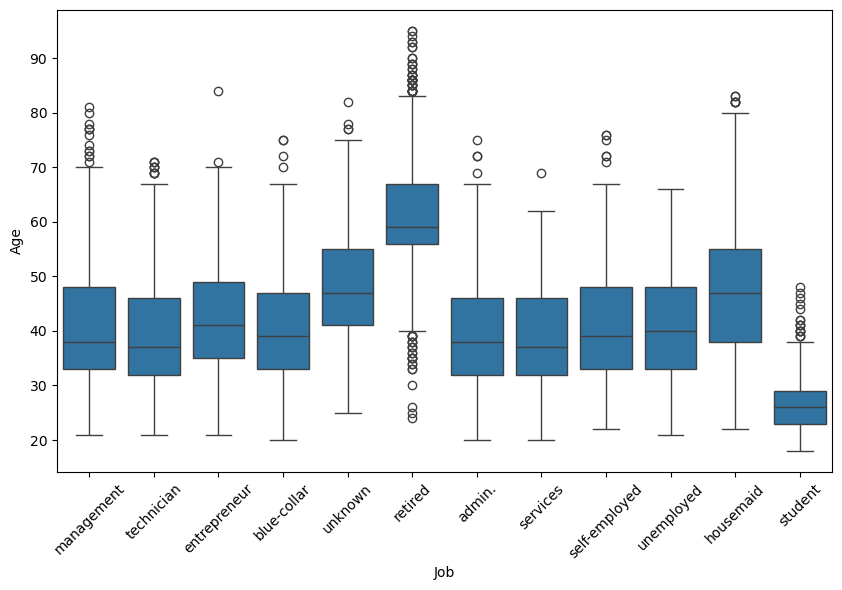

In [82]:
# Boxplotの描画
plt.figure(figsize=(10, 6))
sns.boxplot(x="job", y="age", data=bank)
plt.xlabel("Job")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

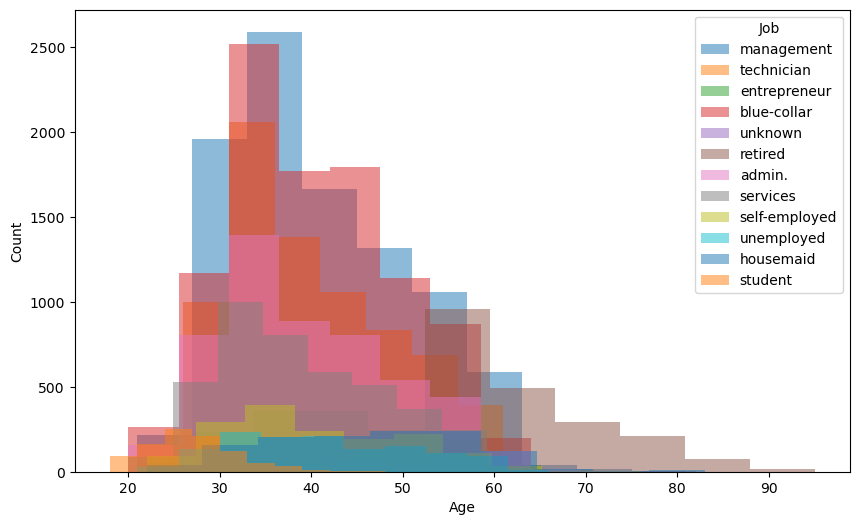

In [83]:
# 職種ごとの年齢分布をヒストグラムで描画
plt.figure(figsize=(10, 6))

# 各職種ごとにヒストグラムをプロット
for job in bank["job"].unique():
    plt.hist(
        bank[bank["job"] == job]["age"],
        bins=10,
        alpha=0.5,
        label=job,
    )

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Job")
plt.show()
